<a href="https://colab.research.google.com/github/Saranpornuppa/CS245_Machine-Learning-Project/blob/main/Asian_Export.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Export value of small and medium enterprises in Asian countries


# **Import Required Packages**

ทำการนำแพ็คเกจที่จำเป็นทั้งหมด import เข้ามา


In [59]:
import matplotlib as mpt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import operator
import math
import matplotlib as mpl


#**Input Data**
ทำการอ่านชุดข้อมูลในพื้นที่ทำงานเป็น dataframe ชื่อ Export

In [79]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font',family='TH Sarabun Chula')

url ='https://drive.google.com/file/d/1HSFGjvzwbIm5xRwqqbE7ZAsxntcDmmgz/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url ='https://drive.google.com/uc?id='+file_id

replace THSarabunChula-Regular.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [80]:
Export=pd.read_csv(dwn_url)
Export

,ประเทศ,HS 2dg,คำอธิบาย-HS 2dg,HS 4dg,คำอธิบาย-HS 4dg,มูลค่า (บาท),มูลค่า (ดอลล่าร์),ขนาดธุรกิจ,เดือน,ปี
0,LAO REPUBLIC,1,สัตว์มีชีวิต,101,ม้า ลาและล่อ มีชีวิต,"378,720","12,706",Micro,1,2564
1,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,"157,401,074","5,280,853",L,1,2564
2,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,"71,046,000","2,383,614",M,1,2564
3,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,"3,527,541","118,350",Micro,1,2564
4,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,"74,218,937","2,490,067",S,1,2564
...,...,...,...,...,...,...,...,...,...,...
54739,VIETNAM,96,ผลิตภัณฑ์เบ็ดเตล็ด,9620,ขาตั้งกล้องแบบขาเดียว ขาตั้งกล้องแบบสองขา ขาตั...,"294,153","8,909",M,9,2564
54740,VIETNAM,97,ศิลปกรรม ของที่นักสะสมรวบรวม และโบราณวัตถุ,9701,ภาพระบาย ภาพลายเส้น และภาพพาสเทล ที่เขียนด้วยม...,"3,302",100,NaN,9,2564
54741,VIETNAM,97,ศิลปกรรม ของที่นักสะสมรวบรวม และโบราณวัตถุ,9701,ภาพระบาย ภาพลายเส้น และภาพพาสเทล ที่เขียนด้วยม...,"11,396",350,NaN,8,2564
54742,VIETNAM,97,ศิลปกรรม ของที่นักสะสมรวบรวม และโบราณวัตถุ,9703,ประติมากรรมวัตถุหรือรูปปั้นหรือรูปหล่อที่เป็นต...,"19,532",600,S,8,2564


# **Display Summary Information**

แสดงข้อมูลสรุปเกี่ยวกับชุดข้อมูลโดยแสดงเกี่ยวกับข้อมูลพื้นฐาน เช่น จำนวนแถวและคอลัมน์ ข้อมูลโดยละเอียดเกี่ยวกับแต่ละคอลัมน์ และรายละเอียดทางสถิติเชิงพรรณนาของชุดข้อมูล นอกจากนี้ยังมีการแสดง 10 แถวแรกในชุดข้อมูล

In [81]:
Export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54744 entries, 0 to 54743
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ประเทศ               54744 non-null  object
 1   HS 2dg               54744 non-null  int64 
 2   คำอธิบาย-HS 2dg      54744 non-null  object
 3   HS 4dg               54744 non-null  int64 
 4   คำอธิบาย-HS 4dg      54744 non-null  object
 5    มูลค่า (บาท)        54744 non-null  object
 6    มูลค่า (ดอลล่าร์)   54744 non-null  object
 7   ขนาดธุรกิจ           47027 non-null  object
 8   เดือน                54744 non-null  int64 
 9   ปี                   54744 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 4.2+ MB


In [82]:
Export.describe()

,HS 2dg,HS 4dg,เดือน,ปี
count,54744.000000,54744.000000,54744.000000,54744.0
mean,55.133951,5527.425343,5.092576,2564.0
std,27.526665,2757.934937,2.604339,0.0
min,1.000000,101.000000,1.000000,2564.0
25%,32.000000,3209.000000,3.000000,2564.0
50%,61.000000,6107.000000,5.000000,2564.0
75%,84.000000,8412.000000,7.000000,2564.0
max,97.000000,9705.000000,9.000000,2564.0


In [83]:
Export.head(10)

,ประเทศ,HS 2dg,คำอธิบาย-HS 2dg,HS 4dg,คำอธิบาย-HS 4dg,มูลค่า (บาท),มูลค่า (ดอลล่าร์),ขนาดธุรกิจ,เดือน,ปี
0,LAO REPUBLIC,1,สัตว์มีชีวิต,101,ม้า ลาและล่อ มีชีวิต,"378,720","12,706",Micro,1,2564
1,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,"157,401,074","5,280,853",L,1,2564
2,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,"71,046,000","2,383,614",M,1,2564
3,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,"3,527,541","118,350",Micro,1,2564
4,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,"74,218,937","2,490,067",S,1,2564
5,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,"2,700,000","90,758",NaN,2,2564
6,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,"157,839,234","5,305,591",L,2,2564
7,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,"55,584,000","1,868,395",M,2,2564
8,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,"2,490,042","83,700",Micro,2,2564
9,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,"40,352,350","1,356,400",S,2,2564


# **Data Cleansing**
  ทำการแสดงข้อมูลว่ามีข้อมูลส่วนไหนขาดหายหรือไม่มีข้อมูล พร้อมทั้ง Data Cleansing เช่น การแสดงรายละเอียดเกี่ยวกับข้อมูลที่ขาดหาย การนำค่าฐานนิยมมาแทนข้อมูลที่ขาดหาย จำนวนของค่า NaN ในทุกคอลัมน์ที่เรียงลำดับจากมากไปหาน้อย  แสดงจำนวนรายการซ้ำที่พบ จากนั้น ลบรายการที่ซ้ำกันทั้งหมด และ ให้ตรวจสอบว่ารายการที่ซ้ำทั้งหมดถูกลบออกจากชุดข้อมูลแล้ว

In [84]:
Export.isnull().sum().sort_values(ascending=False)

ขนาดธุรกิจ             7717
ประเทศ                    0
HS 2dg                    0
คำอธิบาย-HS 2dg           0
HS 4dg                    0
คำอธิบาย-HS 4dg           0
 มูลค่า (บาท)             0
 มูลค่า (ดอลล่าร์)        0
เดือน                     0
ปี                        0
dtype: int64

In [85]:
Export.isnull()

,ประเทศ,HS 2dg,คำอธิบาย-HS 2dg,HS 4dg,คำอธิบาย-HS 4dg,มูลค่า (บาท),มูลค่า (ดอลล่าร์),ขนาดธุรกิจ,เดือน,ปี
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
54739,False,False,False,False,False,False,False,False,False,False
54740,False,False,False,False,False,False,False,True,False,False
54741,False,False,False,False,False,False,False,True,False,False
54742,False,False,False,False,False,False,False,False,False,False


In [86]:
Export.isnull().sum()

ประเทศ                    0
HS 2dg                    0
คำอธิบาย-HS 2dg           0
HS 4dg                    0
คำอธิบาย-HS 4dg           0
 มูลค่า (บาท)             0
 มูลค่า (ดอลล่าร์)        0
ขนาดธุรกิจ             7717
เดือน                     0
ปี                        0
dtype: int64

In [87]:
Export['ขนาดธุรกิจ'].fillna(Export['ขนาดธุรกิจ'].mode()[0], inplace=True)
Export.isnull().sum().sort_values(ascending=False)


ประเทศ                 0
HS 2dg                 0
คำอธิบาย-HS 2dg        0
HS 4dg                 0
คำอธิบาย-HS 4dg        0
 มูลค่า (บาท)          0
 มูลค่า (ดอลล่าร์)     0
ขนาดธุรกิจ             0
เดือน                  0
ปี                     0
dtype: int64

In [88]:
Export[' มูลค่า (บาท) '] = Export[' มูลค่า (บาท) '].str.replace(',','').astype(int)
Export[' มูลค่า (ดอลล่าร์) '] = Export[' มูลค่า (ดอลล่าร์) '].str.replace(',','').astype(int)
Export[[' มูลค่า (บาท) ', ' มูลค่า (ดอลล่าร์) ']].dtypes

 มูลค่า (บาท)          int64
 มูลค่า (ดอลล่าร์)     int64
dtype: object

In [89]:
print("Number of duplicate rows ",len(Export) - len(Export.drop_duplicates()))
Export = Export.drop_duplicates()
print("Number of duplicate rows ",len(Export) - len(Export.drop_duplicates()))

Number of duplicate rows  2
Number of duplicate rows  0


In [90]:
print("Number of rows with all NaNs = ",Export.isnull().all(axis=1).sum())

Number of rows with all NaNs =  0


# **Data Validity**

*  ทำการตรวจสอบมูลค่าการส่งออกในหน่วยสกุลเงินบาท เทียบกับหน่วยสกุลเงินดอลล่าร์ โดยอัตราการแลกเปลี่ยนค่าเงค่าเงินในปี พ.ศ. 2564 จำนวนเงิน 1 ดอลล่าร์ = ประมาณ 34 บาท ส่งผลให้ต้องทำการนำข้อมูลที่มีจำนวนเงินบาทน้อยกว่ากว่าเงินที่เออก เนื่องจากทำให้สกุลเงินดอลล่าร์มีค่าเป็น 0 ส่งผลให้ต้องทำการนำข้อมูลที่มีจำนวนเงินบาทน้อยกว่าอัตราการแลกเปลี่ยนใน 1 หน่วยออก เนื่องจากทำให้ไม่มีมูลค่าการส่งออกในหน่วยสกุลเงินดอลล่าร์

*  ทำการตรวจสอบมูลค่าการส่งออกสินค้าว่ามีการส่งออกจริงหรือไม่ โดยตรวจสอบจากจำนวนเงินที่มีการส่งออกทั้งสกุลเงินบาท และ สกุลเงินดอลล่าร์ ถ้าหากมีค่าเป็น 0 หมายความว่าไม่มีการส่งออก และจะทำการนำค่านั้นออก









In [91]:
print('Number of rows with  มูลค่า (บาท) are less than 34 baht = ',len(Export.loc[(Export[' มูลค่า (บาท) '] < 34)]))
Export=Export.drop(Export.loc[(Export[' มูลค่า (บาท) '] <34)].index)
print('Number after drop of rows with  มูลค่า (บาท)  are less than 34 baht = ',len(Export.loc[(Export[' มูลค่า (บาท) '] < 34)]))
Export

Number of rows with  มูลค่า (บาท) are less than 34 baht =  243
Number after drop of rows with  มูลค่า (บาท)  are less than 34 baht =  0


,ประเทศ,HS 2dg,คำอธิบาย-HS 2dg,HS 4dg,คำอธิบาย-HS 4dg,มูลค่า (บาท),มูลค่า (ดอลล่าร์),ขนาดธุรกิจ,เดือน,ปี
0,LAO REPUBLIC,1,สัตว์มีชีวิต,101,ม้า ลาและล่อ มีชีวิต,378720,12706,Micro,1,2564
1,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,157401074,5280853,L,1,2564
2,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,71046000,2383614,M,1,2564
3,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,3527541,118350,Micro,1,2564
4,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,74218937,2490067,S,1,2564
...,...,...,...,...,...,...,...,...,...,...
54739,VIETNAM,96,ผลิตภัณฑ์เบ็ดเตล็ด,9620,ขาตั้งกล้องแบบขาเดียว ขาตั้งกล้องแบบสองขา ขาตั...,294153,8909,M,9,2564
54740,VIETNAM,97,ศิลปกรรม ของที่นักสะสมรวบรวม และโบราณวัตถุ,9701,ภาพระบาย ภาพลายเส้น และภาพพาสเทล ที่เขียนด้วยม...,3302,100,L,9,2564
54741,VIETNAM,97,ศิลปกรรม ของที่นักสะสมรวบรวม และโบราณวัตถุ,9701,ภาพระบาย ภาพลายเส้น และภาพพาสเทล ที่เขียนด้วยม...,11396,350,L,8,2564
54742,VIETNAM,97,ศิลปกรรม ของที่นักสะสมรวบรวม และโบราณวัตถุ,9703,ประติมากรรมวัตถุหรือรูปปั้นหรือรูปหล่อที่เป็นต...,19532,600,S,8,2564


In [92]:
print('Number of rows with  มูลค่า (บาท) or มูลค่า (ดอลล่าร์) is zero = ',len(Export.loc[(Export[' มูลค่า (บาท) '] == 0) | (Export[' มูลค่า (ดอลล่าร์) '] == 0)]))
Export=Export.drop(Export.loc[(Export[' มูลค่า (บาท) '] == 0) | (Export[' มูลค่า (ดอลล่าร์) '] == 0)].index)
print("Number after drop of rows with  มูลค่า (บาท) or มูลค่า (ดอลล่าร์) is zero = ",len(Export.loc[(Export[' มูลค่า (บาท) '] == 0) | (Export[' มูลค่า (ดอลล่าร์) '] == 0)]))
Export
# len(Export.loc[Export[' มูลค่า (ดอลล่าร์) '] ==0])
# len(Export.loc[Export[' มูลค่า (บาท) '] ==0])

Number of rows with  มูลค่า (บาท) or มูลค่า (ดอลล่าร์) is zero =  0
Number after drop of rows with  มูลค่า (บาท) or มูลค่า (ดอลล่าร์) is zero =  0


,ประเทศ,HS 2dg,คำอธิบาย-HS 2dg,HS 4dg,คำอธิบาย-HS 4dg,มูลค่า (บาท),มูลค่า (ดอลล่าร์),ขนาดธุรกิจ,เดือน,ปี
0,LAO REPUBLIC,1,สัตว์มีชีวิต,101,ม้า ลาและล่อ มีชีวิต,378720,12706,Micro,1,2564
1,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,157401074,5280853,L,1,2564
2,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,71046000,2383614,M,1,2564
3,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,3527541,118350,Micro,1,2564
4,LAO REPUBLIC,1,สัตว์มีชีวิต,102,สัตว์จำพวกโคกระบือ มีชีวิต,74218937,2490067,S,1,2564
...,...,...,...,...,...,...,...,...,...,...
54739,VIETNAM,96,ผลิตภัณฑ์เบ็ดเตล็ด,9620,ขาตั้งกล้องแบบขาเดียว ขาตั้งกล้องแบบสองขา ขาตั...,294153,8909,M,9,2564
54740,VIETNAM,97,ศิลปกรรม ของที่นักสะสมรวบรวม และโบราณวัตถุ,9701,ภาพระบาย ภาพลายเส้น และภาพพาสเทล ที่เขียนด้วยม...,3302,100,L,9,2564
54741,VIETNAM,97,ศิลปกรรม ของที่นักสะสมรวบรวม และโบราณวัตถุ,9701,ภาพระบาย ภาพลายเส้น และภาพพาสเทล ที่เขียนด้วยม...,11396,350,L,8,2564
54742,VIETNAM,97,ศิลปกรรม ของที่นักสะสมรวบรวม และโบราณวัตถุ,9703,ประติมากรรมวัตถุหรือรูปปั้นหรือรูปหล่อที่เป็นต...,19532,600,S,8,2564


# **Data Wrangling**

In [93]:
df = pd.DataFrame(Export)
money_baht = []
month= []
for i in df.index:
    money_baht.append(df.loc[i,' มูลค่า (ดอลล่าร์) '])
    month.append(df.loc[i,'เดือน'])
d = {'เดือน':month, ' มูลค่า (ดอลล่าร์) ':money_baht}
df2 = pd.DataFrame(d)
df2 = df2.groupby('เดือน').sum()
print(df2)

        มูลค่า (ดอลล่าร์) 
เดือน                     
1               1586931552
2               1491657350
3               1885915042
4               1693829180
5               1775355230
6               1683671134
7               1396538169
8               3684388307
9               3563828618


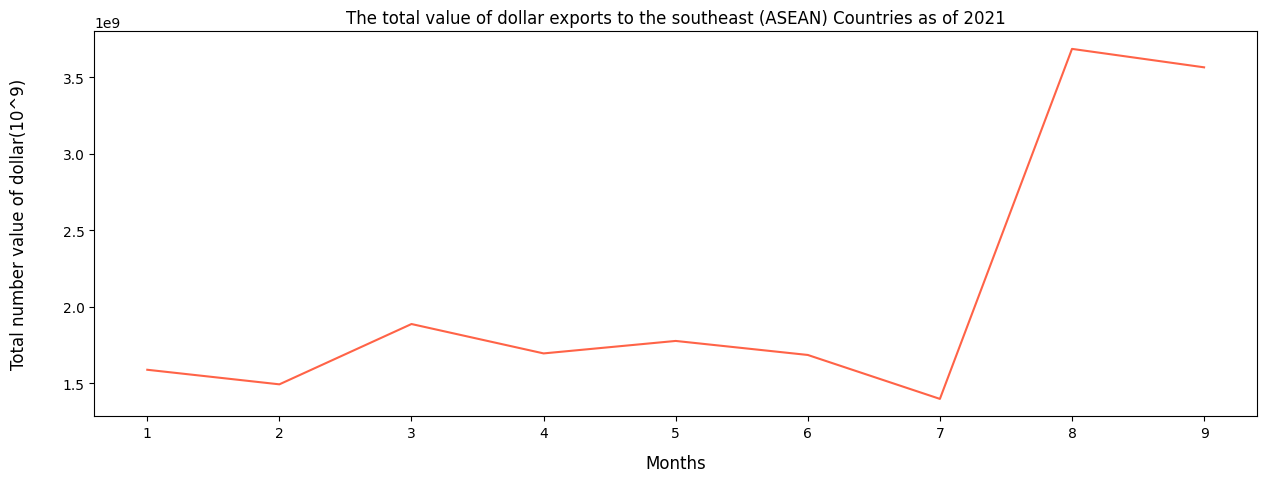

In [94]:
plt.style.use('default')
money_baht = []
month= []
for i in df.index:
    money_baht.append(df.loc[i,' มูลค่า (ดอลล่าร์) '])
    month.append(df.loc[i,'เดือน'])
d = {'เดือน':month, ' มูลค่า (ดอลล่าร์) ':money_baht}
df2 = pd.DataFrame(d)
df2 = df2.groupby('เดือน').sum()
money =[df2.loc[i,' มูลค่า (ดอลล่าร์) '] for i in df2.index]
month =[i for i in df2.index]
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(month,money, color="Tomato")
ax.set_title("The total value of dollar exports to the southeast (ASEAN) Countries as of 2021", color="black")
ax.set_xlabel('Months', fontsize='large', labelpad=10)
ax.set_ylabel('Total number value of dollar(10^9)', fontsize='large', labelpad=25);
plt.show()

ประเทศ             ขนาดธุรกิจ
BRUNEI DARUSSALAM  L             1118
                   M              275
                   Micro          105
                   S              161
CAMBODIA           L             1766
                   M              714
                   Micro          263
                   S              520
INDONESIA          L             1159
                   M              570
                   Micro           97
                   S              331
LAO REPUBLIC       L             6390
                   M             3660
                   Micro         1869
                   S             3496
MALAYSIA           L             5149
                   M             2494
                   Micro          697
                   S             2058
MYANMAR            L             6651
                   M             3468
                   Micro         1286
                   S             2562
PHILIPPINES        L             1103
                   M

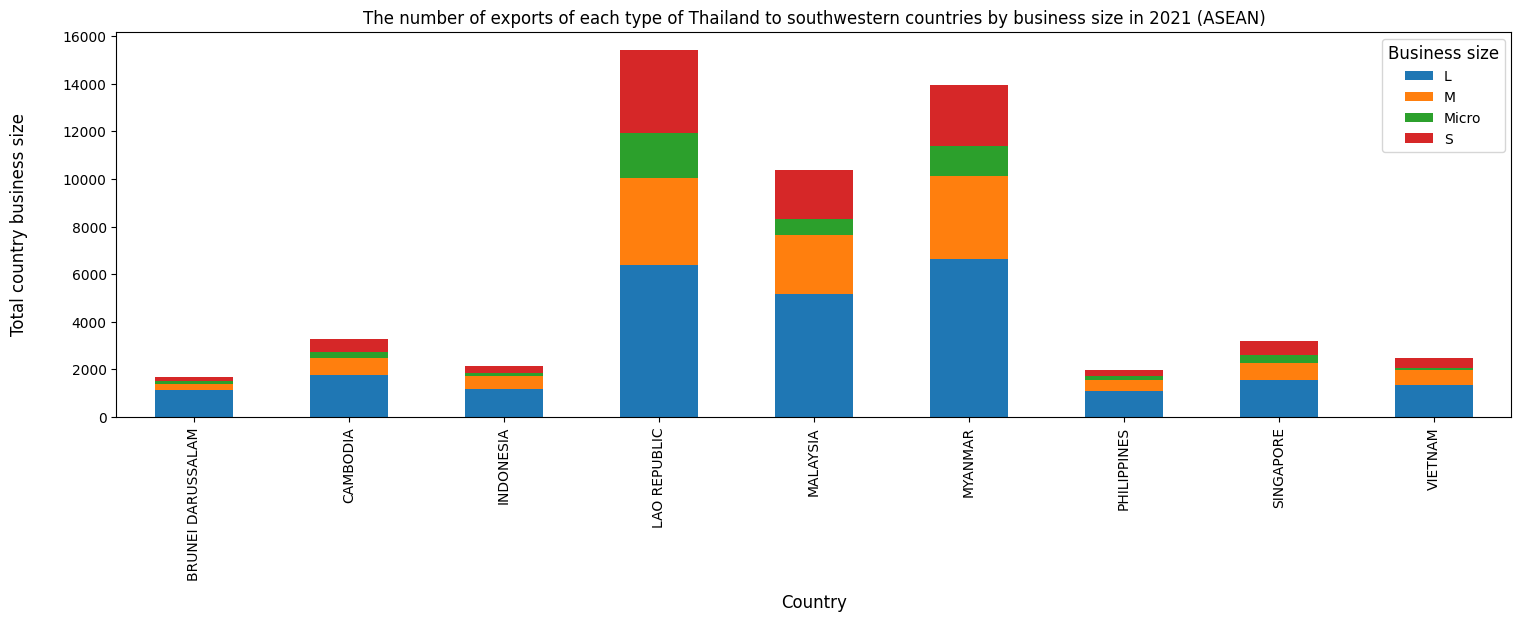

In [95]:
df = pd.DataFrame(Export)
by_country=df.groupby(["ประเทศ", "ขนาดธุรกิจ"])["ขนาดธุรกิจ"].count()
print(by_country)
ax=by_country.groupby(['ประเทศ','ขนาดธุรกิจ']).sum().unstack().plot(kind='bar', stacked = True,figsize = (18,5))
ax.legend(title='Business size', title_fontsize='large')
ax.legend(title='Business size', title_fontsize='large')
ax.set_xlabel('Country', fontsize='large', labelpad=10)
ax.set_ylabel('Total country business size', fontsize='large', labelpad=25);
ax.set_title("The number of exports of each type of Thailand to southwestern countries by business size in 2021 (ASEAN)", color="black")
plt.show()

                    มูลค่า (ดอลล่าร์)    มูลค่า (บาท) 
ประเทศ                                                
BRUNEI DARUSSALAM             47145490      1432912650
CAMBODIA                    1239390543     40656083209
INDONESIA                   1667038047     54622175622
LAO REPUBLIC                2384566739     72525082151
MALAYSIA                    6669130575    203152029349
MYANMAR                     2413054853     73623158987
PHILIPPINES                 1287463041     42207544223
SINGAPORE                   1515368393     49658937033
VIETNAM                     1538956901     50460574799



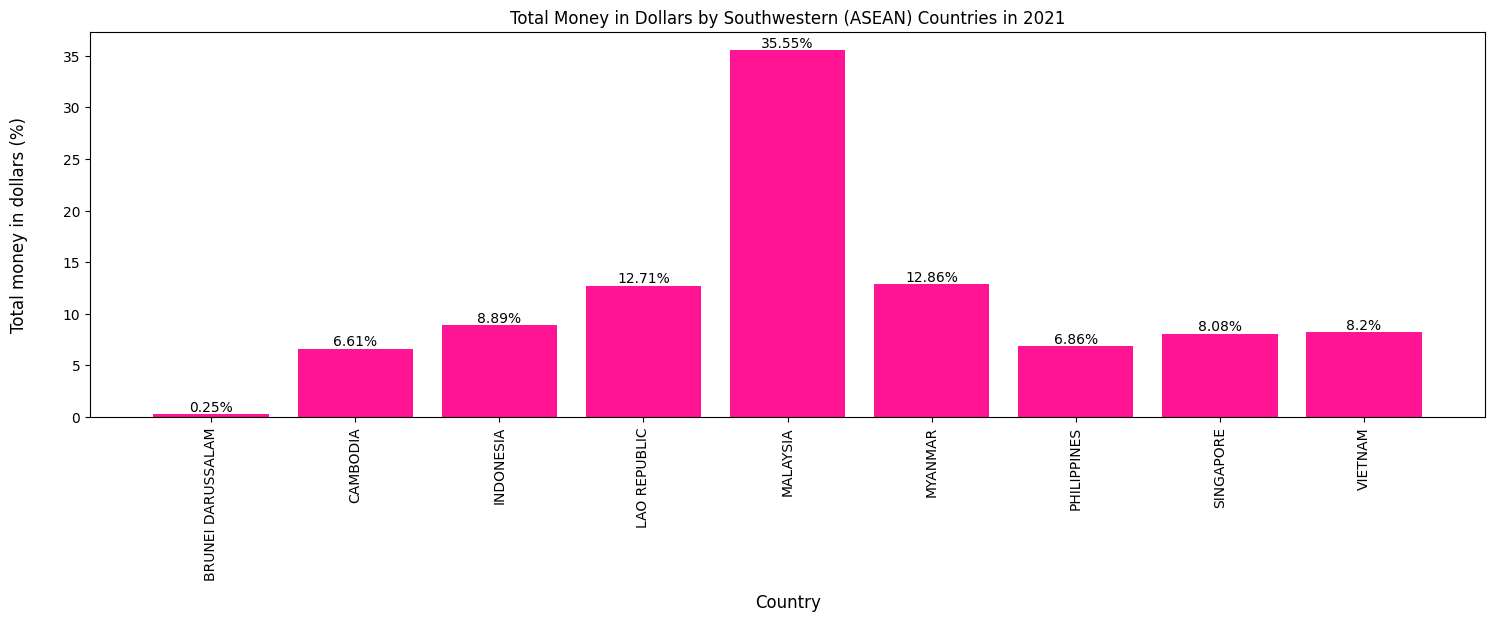

In [96]:
df = pd.DataFrame(Export)
money_dollar = []
money_baht = []
country = []
for i in df.index:
  money_dollar.append(df.loc[i,' มูลค่า (ดอลล่าร์) '])
  money_baht.append(df.loc[i,' มูลค่า (บาท) '])
  country.append(df.loc[i,'ประเทศ'])
d = {'ประเทศ':country, ' มูลค่า (ดอลล่าร์) ':money_dollar, ' มูลค่า (บาท) ':money_baht}
df2 = pd.DataFrame(d)
df2 = df2.groupby('ประเทศ').sum()
print(df2)
print()

plt.style.use('default')
money_dollar = []
country = []
for i in df.index:
    money_dollar.append(df.loc[i,' มูลค่า (ดอลล่าร์) '])
    country.append(df.loc[i,'ประเทศ'])
d = {'ประเทศ':country, ' มูลค่า (ดอลล่าร์) ':money_dollar}
df2 = pd.DataFrame(d)
df2 = df2.groupby('ประเทศ').sum()
df3 = df[' มูลค่า (ดอลล่าร์) '].sum()
money_dollar =[round(df2.loc[i,' มูลค่า (ดอลล่าร์) ']*100/df3,2) for i in df2.index]
country =[i for i in df2.index]
fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x=np.arange(len(money_dollar)),
       height=money_dollar,
       color="DeepPink",
       align="center",
       tick_label=country)
for i in range(0,9):
  plt.text(i,money_dollar[i],str(money_dollar[i])+'%',ha="center",va="bottom")
ax.set_xticklabels(country,rotation=90)
ax.set_title("Total Money in Dollars by Southwestern (ASEAN) Countries in 2021", color="black")
ax.set_xlabel('Country', fontsize='large', labelpad=10)
ax.set_ylabel('Total money in dollars (%)', fontsize='large', labelpad=25);
plt.show()
print()

In [97]:
most_Export=Export.loc[Export['ประเทศ']=='MALAYSIA']['HS 2dg'].value_counts()
value_dollar = []
number = []
for i in df.index:
  if df.loc[i, 'ประเทศ'] == "MALAYSIA":
    value_dollar .append(df.loc[i,' มูลค่า (ดอลล่าร์) '])
    number.append(df.loc[i,'HS 2dg'])
d = {'number':number, 'value_dollor ':value_dollar}
df2 = pd.DataFrame(d)
df2 = df2.groupby('number').sum()
df2 = df2.groupby(['number', most_Export]).sum()
df2

,,value_dollor
number,HS 2dg,
1,18,8106916
2,21,48455068
3,171,48520870
4,44,1767315
5,3,21295
...,...,...
93,2,35
94,125,29488163
95,85,1361030


   index  Total number each size business
0      L                            26221
1      M                            12963
2      S                            10359
3  Micro                             4956


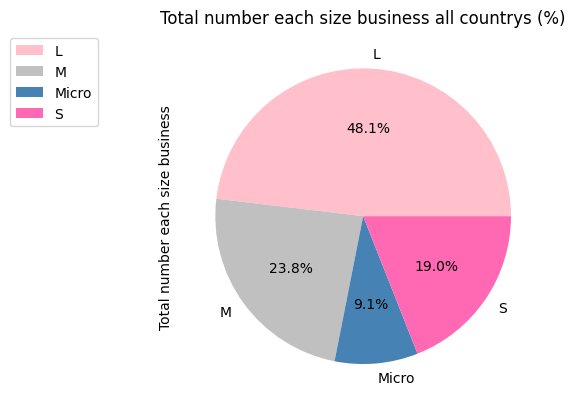

In [98]:
print(df['ขนาดธุรกิจ'].value_counts().reset_index(name='Total number each size business'))

df = pd.DataFrame(Export)
d = df['ขนาดธุรกิจ'].value_counts().reset_index(name='Total number each size business')

df2 = pd.DataFrame(data=d)
df2

plt.style.use('default')
colors = ['pink', 'silver', 'steelblue','hotpink']
df2.groupby(['index']).sum().plot(
    kind='pie', y='Total number each size business',title='Total number each size business all countrys (%)',
  autopct='%1.1f%%', colors=colors)
plt.legend(prop={'size': 10},bbox_to_anchor=(-0.2, 1))
plt.show()

             มูลค่า (ดอลล่าร์) 
ขนาดธุรกิจ                     
L                   15461857733
M                    1648178579
Micro                 403154754
S                    1248923516


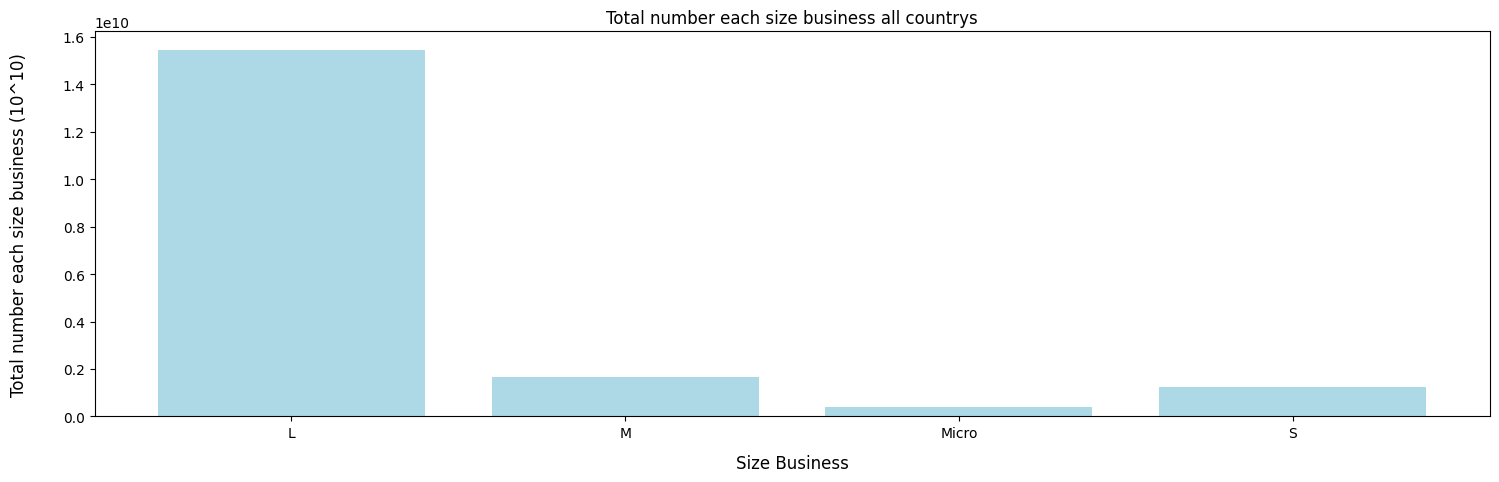

In [99]:
moneydollars = []
sizebusiness = []
for i in df.index:
  moneydollars.append(df.loc[i,' มูลค่า (ดอลล่าร์) '])
  sizebusiness.append(df.loc[i,'ขนาดธุรกิจ'])
dd = {'ขนาดธุรกิจ':sizebusiness, ' มูลค่า (ดอลล่าร์) ':moneydollars}
df3 = pd.DataFrame(dd)
df3 = df3.groupby('ขนาดธุรกิจ').sum()
print(df3)

plt.style.use('default')
moneydollars = []
sizebusiness = []
for i in df.index:
  moneydollars.append(df.loc[i,' มูลค่า (ดอลล่าร์) '])
  sizebusiness.append(df.loc[i,'ขนาดธุรกิจ'])
dd = {'ขนาดธุรกิจ':sizebusiness, ' มูลค่า (ดอลล่าร์) ':moneydollars}
df3 = pd.DataFrame(dd)
df3 = df3.groupby('ขนาดธุรกิจ').sum()
df4 = df[' มูลค่า (ดอลล่าร์) '].sum()

moneydollars =[df3.loc[i,' มูลค่า (ดอลล่าร์) ']for i in df3.index]
sizebusiness =[i for i in df3.index]
fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x=np.arange(len(moneydollars)),
       height=moneydollars,
       color="lightblue",
       align="center",
       tick_label=sizebusiness)

ax.set_xticklabels(sizebusiness)
ax.set_title("Total number each size business all countrys", color="black")
ax.set_xlabel('Size Business', fontsize='large', labelpad=10)
ax.set_ylabel('Total number each size business (10^10)', fontsize='large', labelpad=25);
plt.show()

#**Data Visualization**

In [100]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
def change_matplotlib_font(font_download_url):
    FONT_PATH = 'MY_FONT'

    font_download_cmd = f"wget {font_download_url} -O {FONT_PATH}.zip"
    unzip_cmd = f"unzip -o {FONT_PATH}.zip -d {FONT_PATH}"
    os.system(font_download_cmd)
    os.system(unzip_cmd)

    font_files = fm.findSystemFonts(fontpaths=FONT_PATH)
    for font_file in font_files:
        fm.fontManager.addfont(font_file)

    font_name = fm.FontProperties(fname=font_files[0]).get_name()
    matplotlib.rc('font', family=font_name)
    print("font family: ", plt.rcParams['font.family'])
font_download_url = "https://fonts.google.com/download?family=Noto%20Serif%20Thai"
change_matplotlib_font(font_download_url)

font family:  ['Noto Serif Thai Condensed']


   index  Total number export each of product
0     84                                 4966
1     85                                 3777
2     39                                 2313
3     73                                 2243
4     90                                 1776
5     48                                 1395
6     40                                 1318
7     38                                 1273
8     28                                 1206
9     72                                 1186



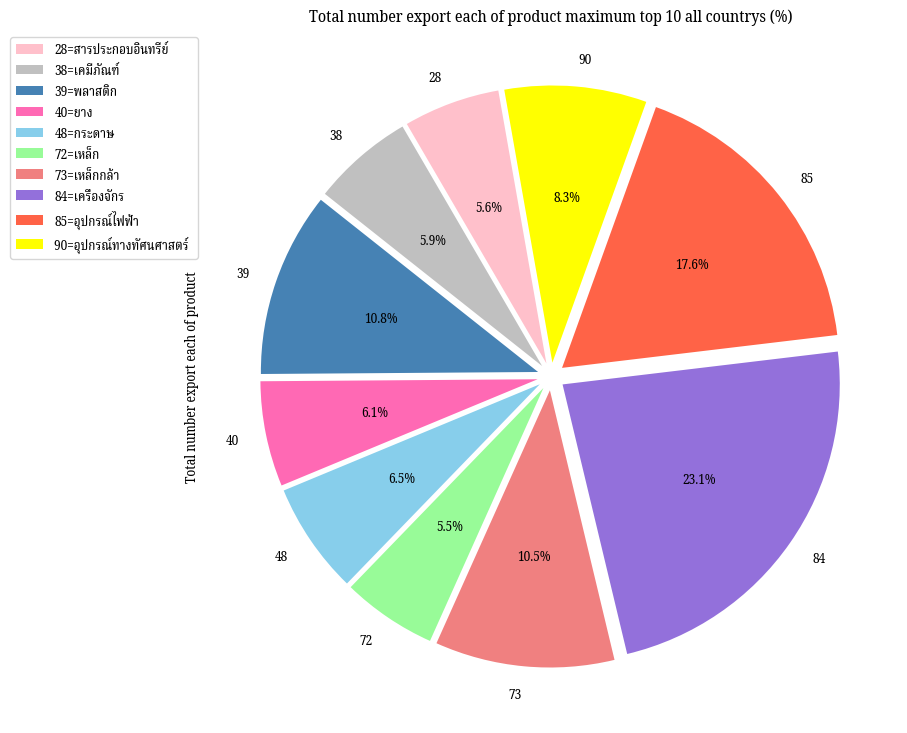

In [101]:
print(df['HS 2dg'].value_counts().nlargest(10).reset_index(name='Total number export each of product'))

df = pd.DataFrame(Export)
d = df['HS 2dg'].value_counts().nlargest(10).reset_index(name='Total number export each of product')

df2 = pd.DataFrame(data=d)
df2
print()
labels = ['28=สารประกอบอินทรีย์','38=เคมีภัณฑ์','39=พลาสติก','40=ยาง','48=กระดาษ','72=เหล็ก','73=เหล็กกล้า','84=เครื่องจักร','85=อุปกรณ์ไฟฟ้า','90=อุปกรณ์ทางทัศนศาสตร์ ']
colors = ['pink', 'silver', 'steelblue','hotpink','skyblue','palegreen','lightcoral','mediumpurple','tomato','yellow']
explode = (0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05)
df2.groupby(['index']).sum().plot(
    kind='pie', y='Total number export each of product',title='Total number export each of product maximum top 10 all countrys (%)',
  autopct='%1.1f%%', colors=colors, explode=explode,startangle=100,figsize=(10, 9))
plt.legend(labels , prop={'size': 10},bbox_to_anchor=(0.0, 1))

plt.show()